# Statistic 2 Project - Linear Regression Analysis between Turkey's Consumer Price Index (CPI) value and USD/TRY 
- Muhamad Firghili
- Hassan Mohammad Hassan
- Rakay Sadiq

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Formatting And Cleaning

In [2]:
cpi_data = pd.read_excel("CPI_Turkey_f2003.xls", sheet_name="cpi_numbers")

In [3]:
cpi_data.set_index('Unnamed: 0', inplace=True)

In [4]:
cpi_data = cpi_data.transpose()

In [5]:
cpi_data.head(10)

Unnamed: 0,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
January,94.77,104.81,114.49,123.57,135.84,146.94,160.90,174.07,182.60,201.98,216.74,233.54,250.45,274.44,299.74,330.75,398.07,446.45,513.30
February,96.23,105.35,114.51,123.84,136.42,148.84,160.35,176.59,183.93,203.12,217.39,234.54,252.24,274.38,302.17,333.17,398.71,448.02,517.96
March,98.12,106.36,114.81,124.18,137.67,150.27,162.12,177.62,184.70,203.96,218.83,237.18,255.23,274.27,305.24,336.48,402.81,450.58,523.53
April,99.09,106.89,115.63,125.84,139.33,152.79,162.15,178.68,186.30,207.05,219.75,240.37,259.39,276.42,309.23,342.78,409.63,454.43,532.32
May,100.04,107.35,116.69,128.20,140.03,155.07,163.19,178.04,190.81,206.61,220.07,241.32,260.85,278.02,310.61,348.34,413.52,460.62,NaN
June,100.12,107.21,116.81,128.63,139.69,154.51,163.37,177.04,188.08,204.76,221.75,242.07,259.51,279.33,309.78,357.44,413.63,465.84,NaN
July,99.93,107.72,116.14,129.72,138.67,155.40,163.78,176.19,187.31,204.29,222.44,243.17,259.74,282.58,310.24,359.41,419.24,468.56,NaN
August,100.09,108.54,117.13,129.15,138.70,155.02,163.29,176.90,188.67,205.43,222.21,243.40,260.78,281.76,311.85,367.66,422.84,472.61,NaN
September,101.44,109.57,118.33,130.81,140.13,155.72,163.93,179.07,190.09,207.55,223.91,243.74,263.11,282.27,313.88,390.84,427.04,477.21,NaN
October,102.38,112.03,120.45,132.47,142.67,159.77,167.88,182.35,196.31,211.62,227.94,248.37,267.20,286.33,320.40,401.27,435.59,487.38,NaN


We need to make it in the form of " Month Year | value " to allow for easier merging and analysis later on

In [6]:
cpi_dates = []
cpi_numbers = []
for year in cpi_data:
    cpi_data[year].apply(lambda x: cpi_numbers.append(x))
    for month in cpi_data.index:
        cpi_dates.append("{} {}".format(month[:3], str(year)[2:]))

In [7]:
cpi_data_formatted = pd.DataFrame({'Date': cpi_dates, 'CPI': cpi_numbers})
cpi_data_formatted.dropna(axis=0, inplace=True)
cpi_data_formatted = cpi_data_formatted.reindex(index=cpi_data_formatted.index[::-1])
cpi_data_formatted.set_index('Date', inplace=True)
cpi_data_formatted.head()

,CPI
Date,
Apr 21,532.32
Mar 21,523.53
Feb 21,517.96
Jan 21,513.30
Dec 20,504.81


Fetching the USD/TRY data

In [8]:
usd_try_data = pd.read_csv('USD_TRY_Monthly_f2003.csv')

In [9]:
usd_try_data.set_index('Date', inplace=True)
usd_try_data

,Price,Open,High,Low,Change %
Date,,,,,
Apr 21,8.2874,8.2596,8.4865,7.9775,0.53%
Mar 21,8.2439,7.4269,8.4677,7.1909,11.06%
Feb 21,7.4226,7.3151,7.4925,6.8882,1.47%
Jan 21,7.3149,7.4403,7.5452,7.2365,-1.64%
Dec 20,7.4370,7.8338,8.0315,7.3010,-5.05%
...,...,...,...,...,...
May 03,1.4290,1.5640,1.5695,1.4190,-8.73%
Apr 03,1.5657,1.7107,1.7127,1.5627,-8.73%
Mar 03,1.7155,1.6665,1.7755,1.5910,7.42%


In [10]:
cpi_currency_data = pd.concat([usd_try_data, cpi_data_formatted], axis=1)
cpi_currency_data.head()

,Price,Open,High,Low,Change %,CPI
Date,,,,,,
Apr 21,8.2874,8.2596,8.4865,7.9775,0.53%,532.32
Mar 21,8.2439,7.4269,8.4677,7.1909,11.06%,523.53
Feb 21,7.4226,7.3151,7.4925,6.8882,1.47%,517.96
Jan 21,7.3149,7.4403,7.5452,7.2365,-1.64%,513.30
Dec 20,7.4370,7.8338,8.0315,7.3010,-5.05%,504.81


In [11]:
cpi_currency_data.reset_index(inplace=True)

In [12]:
cpi_currency_data['Date'] = pd.to_datetime(cpi_currency_data['Date'], format="%b %y")

In [13]:
cpi_currency_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220 entries, 0 to 219
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      220 non-null    datetime64[ns]
 1   Price     220 non-null    float64       
 2   Open      220 non-null    float64       
 3   High      220 non-null    float64       
 4   Low       220 non-null    float64       
 5   Change %  220 non-null    object        
 6   CPI       220 non-null    float64       
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 12.2+ KB


## Exploratory Data Analysis

In [14]:
sns.set(rc={'figure.figsize':(12,5)})
sns.set_style('darkgrid')

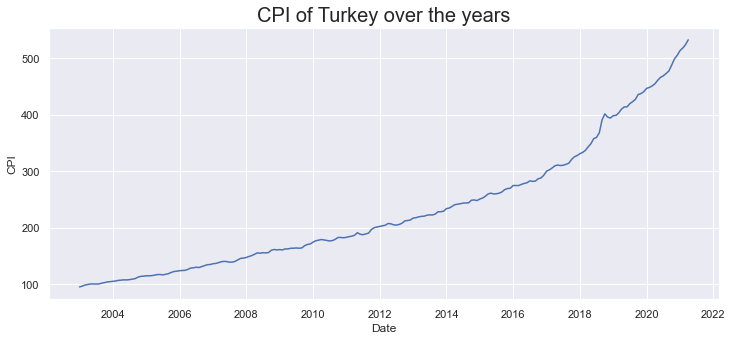

In [15]:
sns.lineplot(x='Date', y='CPI', data=cpi_currency_data)
plt.title('CPI of Turkey over the years', fontsize=20)
plt.show()

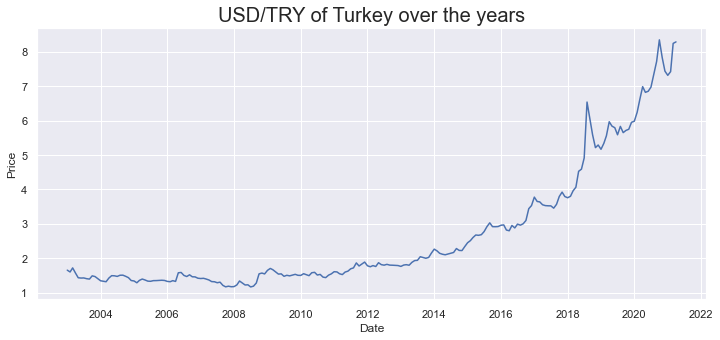

In [16]:
sns.lineplot(x='Date', y='Price', data=cpi_currency_data)
plt.title('USD/TRY of Turkey over the years', fontsize=20)
plt.show()

## Linear Regression and Residual Analysis

In [17]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.api as sms

In [18]:
lin_mod = ols('CPI ~ Price', data=cpi_currency_data).fit()

In [19]:
print(lin_mod.summary())

                            OLS Regression Results                            
Dep. Variable:                    CPI   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                     2571.
Date:                Sun, 30 May 2021   Prob (F-statistic):          1.21e-122
Time:                        08:29:25   Log-Likelihood:                -1069.0
No. Observations:                 220   AIC:                             2142.
Df Residuals:                     218   BIC:                             2149.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     73.5208      3.753     19.587      0.0

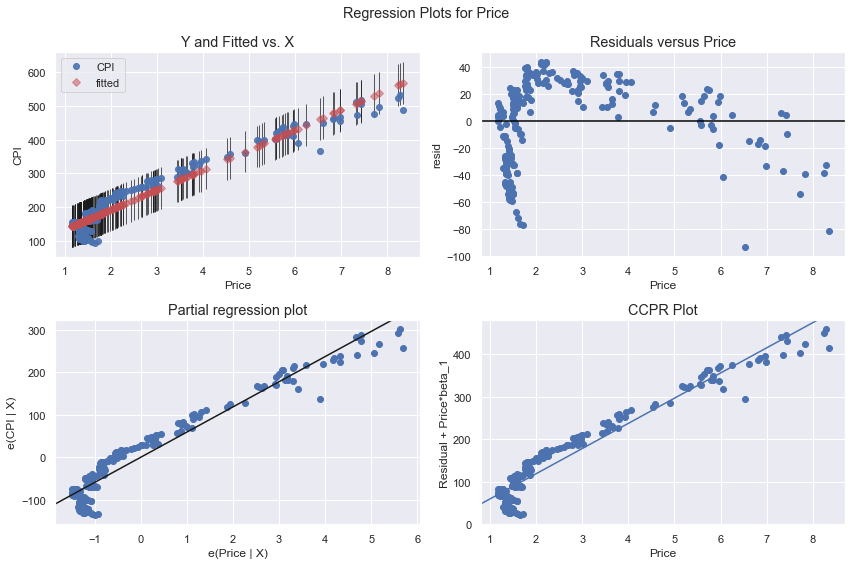

In [175]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(lin_mod, 'Price', fig=fig)
plt.show()

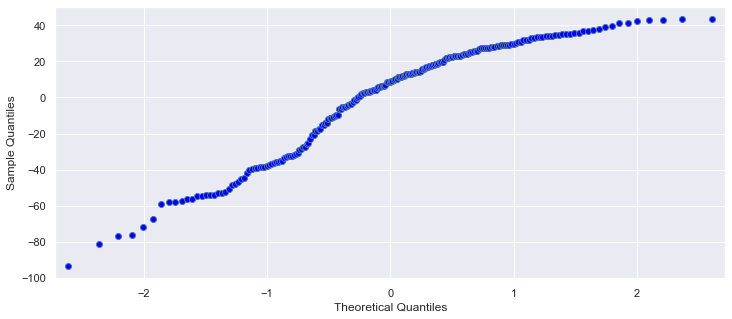

In [27]:
pplot = sm.ProbPlot(lin_mod.resid)
fig = pplot.qqplot()
plt.show()

Q-Q Plot shows Left-Skewness

## Predictive Analysis

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score, r2_score

In [27]:
cpi_currency_data.head()

,Date,Price,Open,High,Low,Change %,CPI
0,2021-04-01,8.2874,8.2596,8.4865,7.9775,0.53%,532.32
1,2021-03-01,8.2439,7.4269,8.4677,7.1909,11.06%,523.53
2,2021-02-01,7.4226,7.3151,7.4925,6.8882,1.47%,517.96
3,2021-01-01,7.3149,7.4403,7.5452,7.2365,-1.64%,513.30
4,2020-12-01,7.4370,7.8338,8.0315,7.3010,-5.05%,504.81


In [28]:
cpi_currency_data.drop(["Open", "High", "Low", "Change %"], axis=1, inplace=True)

In [29]:
cpi_currency_data['Year'] = cpi_currency_data['Date'].apply(lambda x: x.year)
cpi_currency_data['Month'] = cpi_currency_data['Date'].apply(lambda x: x.month)

In [30]:
cpi_currency_data.drop('Date', axis=1, inplace=True)

#### Splitting

In [31]:
X = cpi_currency_data.drop(['Price', 'CPI'], axis=1)
y = cpi_currency_data['Price']

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

### Using SVR To Predict USD/TRY Price

In [33]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

In [34]:
param_grid = {'C':[0.1,1,10,100,1000, 100000], 'gamma':[1,0.1,0.01,0.001,0.00001]}

In [35]:
grid = GridSearchCV(SVR(), param_grid, verbose=3, n_jobs=-1)

In [202]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(estimator=SVR(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100, 1000, 100000],
                         'gamma': [1, 0.1, 0.01, 0.001, 1e-05],
                         'kernel': ['rbf']},
             verbose=3)

In [203]:
svr_pred = grid.predict(X_test)

In [204]:
grid.best_params_

{'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}

In [205]:
print('MAR:', mean_absolute_error(y_test, svr_pred))
print('MSE:', mean_squared_error(y_test, svr_pred))
print('RMSE:', mean_squared_error(y_test, svr_pred) ** 0.5)
print('Explained Variance:', explained_variance_score(y_test, svr_pred))
print('Coefficient of Determination:', r2_score(y_test, svr_pred))

MAR: 0.12766723513862768
MSE: 0.033015488822732246
RMSE: 0.18170164782613352
Explained Variance: 0.9857777954908138
Coefficient of Determination: 0.9857363498599188


In [40]:
pred_to_real = pd.concat([X_test.reset_index().drop('index', axis=1), y_test.reset_index().drop('index', axis=1), pd.Series(svr_pred, name='Predicted Price')], axis=1).head()

<AxesSubplot:xlabel='Year', ylabel='Price'>

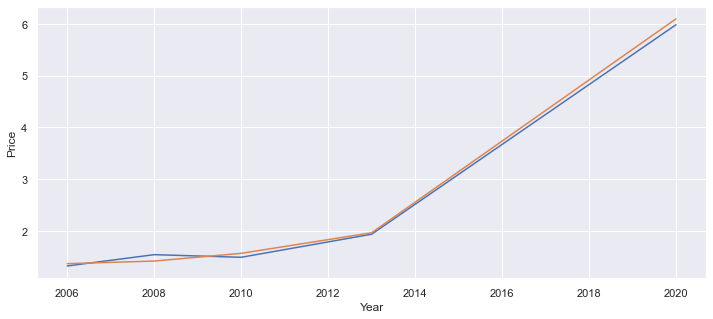

In [41]:
sns.lineplot(x='Year', y='Price', data=pred_to_real)
sns.lineplot(x='Year', y='Predicted Price', data=pred_to_real)

### Predicting Price until year 2030

In [152]:
projected_date_df = pd.DataFrame(pd.date_range(start='2021-05-01', periods=104, freq='M'), columns=['Date'])
projected_date_df = projected_date_df.sort_values(by='Date', ascending=False)
projected_date_df['Year'] = projected_date_df['Date'].apply(lambda x: x.year)
projected_date_df['Month'] = projected_date_df['Date'].apply(lambda x: x.month)
projected_date_df.drop('Date', axis=1, inplace=True)
projected_date_df.reset_index(inplace=True)
projected_date_df.drop('index', axis=1, inplace=True)
projected_date_df.head(5)

,Year,Month
0,2029,12
1,2029,11
2,2029,10
3,2029,9
4,2029,8


In [153]:
projected_price = grid.predict(projected_date_df)
projection_data = pd.concat([projected_date_df ,pd.Series(projected_price, name='Projected Price')], axis=1)
projection_data

,Year,Month,Projected Price
0,2029,12,14.559462
1,2029,11,15.137862
2,2029,10,15.566552
3,2029,9,15.830271
4,2029,8,15.920449
...,...,...,...
99,2021,9,9.040613
100,2021,8,8.952991
101,2021,7,8.820774
102,2021,6,8.648148


#### Using Equation From previous Linear Regression

In [154]:
print(f"y = {res.intercept} + {res.slope}*x")

y = 73.52080213868524 + 59.29987654140391*x


In [155]:
projection_data['Projected CPI'] = projection_data['Projected Price'].apply(lambda x:  73.52080213868524 + 59.29987654140391 * x )

In [156]:
projection_data.head()

,Year,Month,Projected Price,Projected CPI
0,2029,12,14.559462,936.895095
1,2029,11,15.137862,971.194138
2,2029,10,15.566552,996.615403
3,2029,9,15.830271,1012.253917
4,2029,8,15.920449,1017.601438


<AxesSubplot:xlabel='Year', ylabel='Projected CPI'>

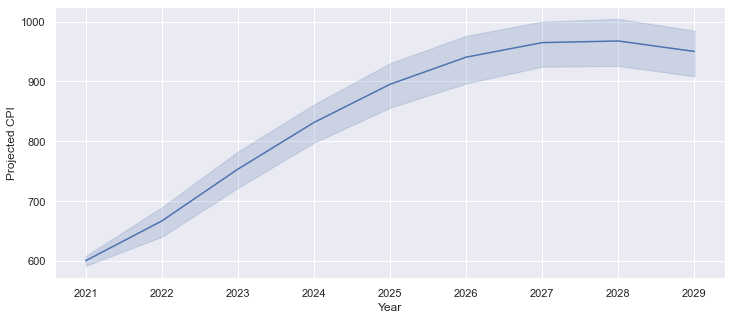

In [158]:
sns.lineplot(x='Year', y='Projected CPI', data=projection_data)

<AxesSubplot:xlabel='Year', ylabel='Projected Price'>

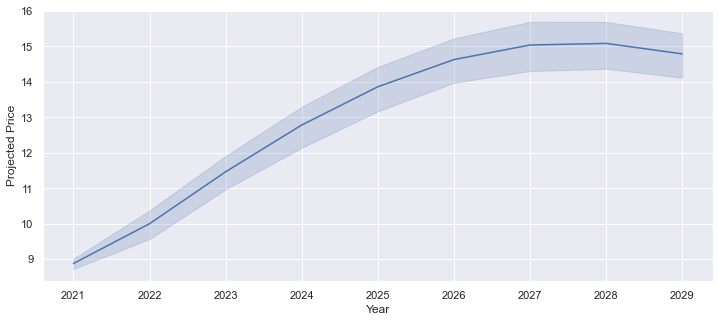

In [159]:
sns.lineplot(x='Year', y='Projected Price', data=projection_data)